In [2]:
pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------------------------------------ --- 1.3/1.5 MB 7.4 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 5.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 1.3/124.9 MB 8.4 MB/s eta 0:00:15
    --------------------------------------- 2.9/124.9 MB 7.3 MB/s eta 0:00:17
   - -------------------------------------- 3.9/124.9 MB 6.5 MB/s eta 0:00:19
   - -------------------------------------- 5.2/124.9 MB 6.5 MB/s eta 0:00:19
   -- ------------------------------------- 7.6/124.9 MB 7.5 MB/s eta 0:00:16
   --- ------------------------------------ 10.2/124.9 MB 8.3 MB/s eta 0:00:14
   ---- ----------------------------------- 12.6/124.9 MB 8.8 MB/s eta 0:00:13
   ---- ----------------------------------- 14.9/124.9 MB 9.1 MB/s eta 0:00:13
   ----- ---------------------------------- 17.6/124.9 MB 9.5 MB/s eta 0:00:12
   ------ --------------------------------- 19.7/124.9 MB 9.5 MB/s eta 0:00:12
   ------- -------------------------------- 22.0/124.9 MB 9.7 MB/s eta 0:00:11
   ------- -------------------------------- 24.6/124.9 MB 9.9 MB/

# 1.Exploratory Data Analysis (EDA):
## 1.Load the Titanic dataset using Python's pandas library.


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder 
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.impute import SimpleImputer
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import classification_report,accuracy_score,precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv('Titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2.Check for missing values.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.drop(columns=['Cabin'],inplace =True)

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

## 3.Explore data distributions using histograms and box plots.

### histograms

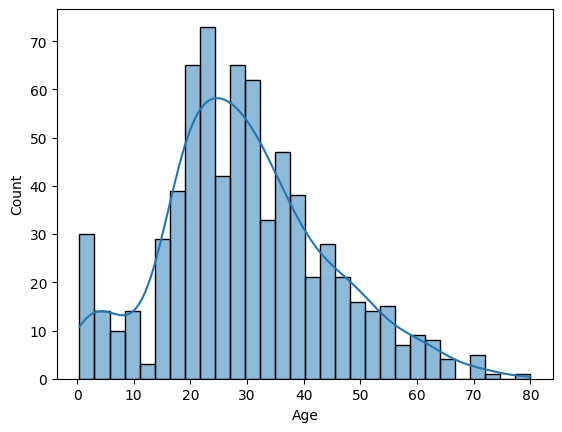

In [8]:
sns.histplot(df['Age'].dropna(),bins = 30,kde = True)
plt.show()

### Boxplot

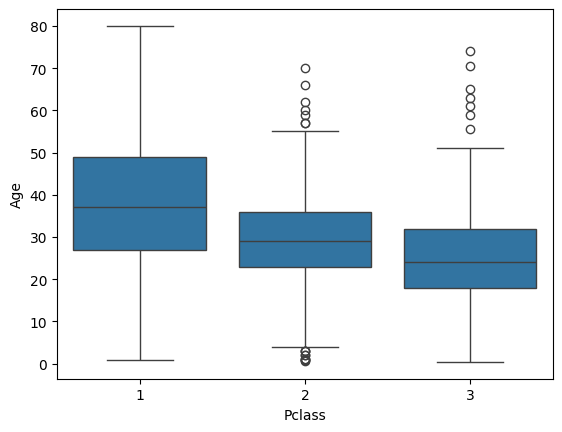

In [9]:
sns.boxplot(x = 'Pclass',y = 'Age',data = df)
plt.show()

## 4.Visualize relationships between features and survival using scatter plots and bar plots.

### Scatter plot

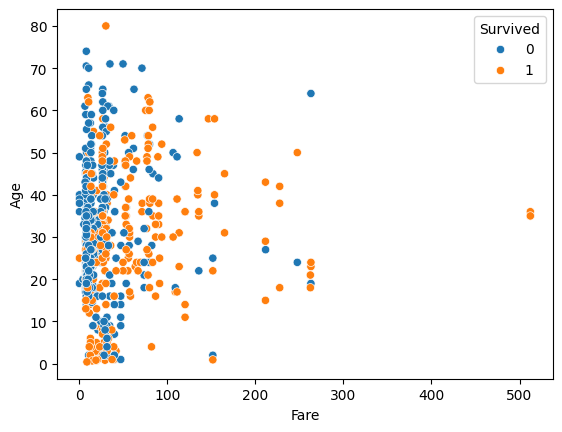

In [10]:
sns.scatterplot(x = 'Fare',y = 'Age',hue = 'Survived',data = df)
plt.show()

### Bar plot

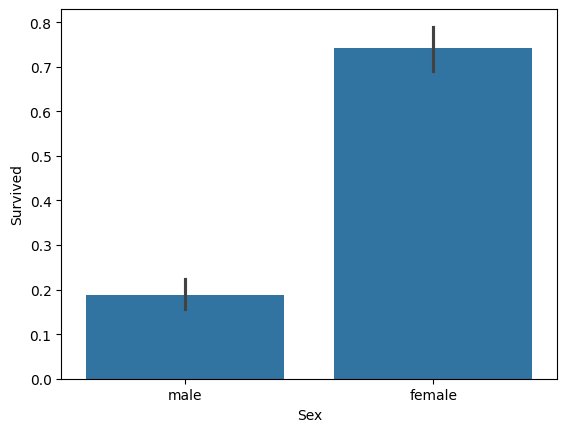

In [11]:
sns.barplot(x = 'Sex',y ='Survived',data = df)
plt.show()

# 2.Data Preprocessing:

## 1.Impute missing values.

In [12]:
imputer_age = SimpleImputer(strategy = 'median')
df['Age'] = imputer_age.fit_transform(df[['Age']])
df['Embarked'].fillna(df['Embarked'].mode()[0])
columns_to_drop = ['Cabin', 'Name', 'Ticket', 'PassengerId']
existing_columns = [col for col in columns_to_drop if col in df.columns]
df.drop(columns=existing_columns, inplace=True) 

## 2.Encode categorical variables using one-hot encoding or label encoding. 

In [13]:
data = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

## 3.If needed you can apply more preprocessing methods on the given dataset.

In [14]:
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# 3.Building Predictive Models:

## 1.Split the preprocessed dataset into training and testing sets.

In [15]:
X = df.drop(columns = ['Survived'])
y = df['Survived']

In [16]:
X_train_df,X_test_df,y_train_df,y_test_df = train_test_split(X,y,test_size = 0.3,random_state = 42)

## 2.Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.

## 3.Build predictive models using LightGBM and XGBoost algorithms.

## 4.Train the models on the training set and evaluate their performance on the testing set.
## 5.Use techniques like cross-validation and hyperparameter tuning to optimize model performance.


### LightGBM Algorithm

In [17]:
lgbm_params = {
    'objective': ['binary'],
    'metric': ['binary_error'],
    'boosting_type': ['gbdt'],
    'num_leaves': [31, 50],
    'learning_rate': [0.05, 0.1]
}

In [18]:
for col in ['Sex', 'Embarked']:
    le = LabelEncoder()
    X_train_df[col] = le.fit_transform(X_train_df[col])
    X_test_df[col] = le.transform(X_test_df[col])  


lgbm_model = lgb.LGBMClassifier()
lgbm_grid = GridSearchCV(lgbm_model, lgbm_params, cv=5, scoring='accuracy')
lgbm_grid.fit(X_train_df, y_train_df)  
lgb_best = lgbm_grid.best_estimator_
lgb_pred = lgb_best.predict(X_test_df)

C:\Users\psara\anaconda3\envs\myenv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\psara\anaconda3\envs\myenv\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\psara\anaconda3\envs\myenv\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\psara\anaconda3\envs\myenv\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\psara\anaconda3\envs\myenv\lib\subprocess.py", line 1436, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executabl

[LightGBM] [Info] Number of positive: 184, number of negative: 314
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000613 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 167
[LightGBM] [Info] Number of data points in the train set: 498, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369478 -> initscore=-0.534457
[LightGBM] [Info] Start training from score -0.534457
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [19]:
cls = classification_report(y_test_df,lgb_pred)
print('Classification Report :')
print(cls)
acc = accuracy_score(y_test_df,lgb_pred)
print('Accuracy Score :',acc)

Classification Report :
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       157
           1       0.81      0.74      0.77       111

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268

Accuracy Score : 0.8208955223880597


### Xg Boost Algorithm

In [20]:
print(X_train_df.info())
print("Unique values in y_train:", np.unique(y_train_df))

<class 'pandas.core.frame.DataFrame'>
Index: 623 entries, 445 to 102
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    623 non-null    int64  
 1   Sex       623 non-null    int64  
 2   Age       623 non-null    float64
 3   SibSp     623 non-null    int64  
 4   Parch     623 non-null    int64  
 5   Fare      623 non-null    float64
 6   Embarked  623 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 38.9 KB
None
Unique values in y_train: [0 1]


In [21]:
train = xgb.DMatrix(X_train_df,label = y_train_df)
test = xgb.DMatrix(X_test_df,label = y_test_df)
params = {
    'max_depth':3,
    'eta': 0.1,
    'objective':'binary:hinge'
}
epochs = 100
XGB_model=xgb.train(params,train,epochs)
XGB_predict = XGB_model.predict(test)

In [22]:
print("Accuracy:", accuracy_score(y_test_df, XGB_predict))
cls1 = classification_report(y_test_df,XGB_predict)
print('Classification Report :')
print(cls1)

Accuracy: 0.8097014925373134
Classification Report :
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       157
           1       0.85      0.66      0.74       111

    accuracy                           0.81       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.82      0.81      0.80       268



# 4.Comparative Analysis:

## 1.Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.
## 2.Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.

LightGBM Performance:
Accuracy: 0.8209
Precision: 0.8119
Recall: 0.7387
F1 Score: 0.7736

XGBoost Performance:
Accuracy: 0.8097
Precision: 0.8488
Recall: 0.6577
F1 Score: 0.7411



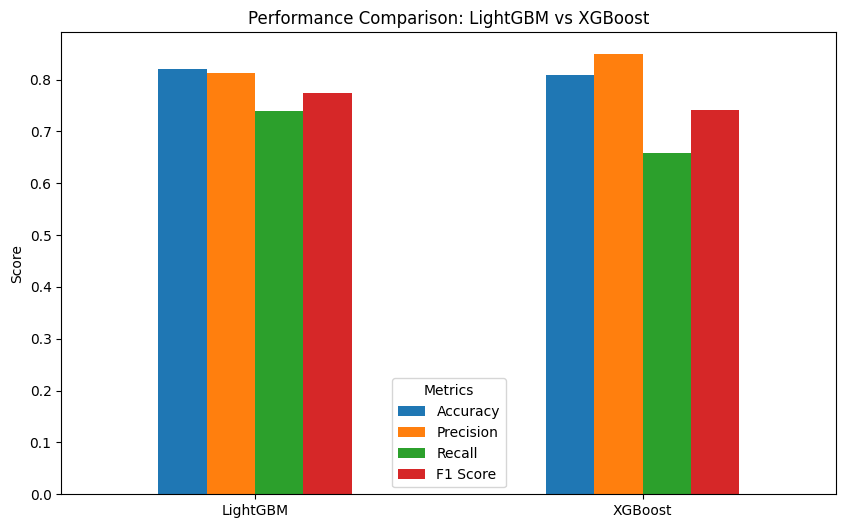

In [23]:
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}\n")
    
    return accuracy, precision, recall, f1  

lgb_accuracy, lgb_precision, lgb_recall, lgb_f1 = evaluate_model(y_test_df, lgb_pred, "LightGBM")
xgb_accuracy, xgb_precision, xgb_recall, xgb_f1 = evaluate_model(y_test_df, XGB_predict, "XGBoost")

results = {
    "LightGBM": [lgb_accuracy, lgb_precision, lgb_recall, lgb_f1],
    "XGBoost": [xgb_accuracy, xgb_precision, xgb_recall, xgb_f1]
}

# Create the results DataFrame
results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1 Score"])

# Visualization of results
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
results_df.T[metrics].plot(kind='bar', figsize=(10,6))
plt.title("Performance Comparison: LightGBM vs XGBoost")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(title="Metrics")
plt.show()